We consider a database containing the relative consumption of certain food items in European countries. The numbers represent the percentage of the population consuming that food type.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('https://openmv.net/file/food-consumption.csv').fillna(0)
data

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19.0,57.0,51,19,21,27,21,81,75,44,71,22,91,85,74,30.0,26
1,Italy,82,10,60,2.0,55.0,41,3,2,4,2,67,71,9,46,80,66,24,94,5.0,18
2,France,88,42,63,4.0,76.0,53,11,23,11,5,87,84,40,45,88,94,47,36,57.0,3
3,Holland,96,62,98,32.0,62.0,67,43,7,14,14,83,89,61,81,15,31,97,13,53.0,15
4,Belgium,94,38,48,11.0,74.0,37,23,9,13,12,76,76,42,57,29,84,80,83,20.0,5
5,Luxembourg,97,61,86,28.0,79.0,73,12,7,26,23,85,94,83,20,91,94,94,84,31.0,24
6,England,27,86,99,22.0,91.0,55,76,17,20,24,76,68,89,91,11,95,94,57,11.0,28
7,Portugal,72,26,77,2.0,22.0,34,1,5,20,3,22,51,8,16,89,65,78,92,6.0,9
8,Austria,55,31,61,15.0,29.0,33,1,5,15,11,49,42,14,41,51,51,72,28,13.0,11
9,Switzerland,73,72,85,25.0,31.0,69,10,17,19,15,79,70,46,61,64,82,48,61,48.0,30


In [ ]:
data.describe()

,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
count,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,78.562500,39.250000,78.500000,16.875000,56.87500,49.000000,18.312500,12.750000,21.875000,15.87500,66.812500,70.500000,41.937500,55.187500,42.312500,75.812500,69.125000,54.187500,19.250000,27.750000
std,23.145824,23.147354,18.540047,11.453529,24.44279,15.427249,20.178268,9.574271,13.980343,12.78997,17.581122,14.033294,23.256451,22.592679,34.677022,20.910026,26.849891,28.842604,19.042059,25.026652
min,27.000000,10.000000,40.000000,0.000000,0.00000,27.000000,1.000000,2.000000,4.000000,2.00000,22.000000,42.000000,8.000000,16.000000,5.000000,31.000000,24.000000,13.000000,0.000000,3.000000
25%,71.500000,17.000000,62.500000,9.250000,49.00000,36.250000,3.750000,6.500000,13.750000,6.50000,56.750000,65.250000,28.000000,40.250000,11.000000,64.500000,47.750000,29.500000,4.500000,10.500000
50%,89.000000,39.000000,84.500000,17.000000,62.00000,47.000000,11.500000,10.000000,19.500000,13.00000,71.500000,72.000000,43.000000,54.000000,25.500000,83.000000,79.000000,52.500000,12.000000,21.000000
75%,96.000000,54.250000,92.250000,25.750000,74.50000,58.000000,20.000000,17.000000,26.250000,21.50000,81.000000,77.250000,50.750000,72.000000,81.500000,94.000000,94.000000,83.250000,30.250000,31.000000
max,98.000000,86.000000,99.000000,35.000000,91.00000,75.000000,76.000000,39.000000,54.000000,45.00000,87.000000,94.000000,89.000000,91.000000,91.000000,97.000000,97.000000,94.000000,57.000000,93.000000


In [ ]:
A = data.to_numpy()[:,1:].T.astype(np.float64)
countries = data.to_numpy()[:,0]
foods = np.array(data.columns[1:])

Each column of the matrix `A` refers to a country, and each row represents a specific food. The arrays `countries` and `foods` contain the list of countries and foods, respectively.

1. How many samples and features are there in the dataset? 

**Answer:**

We have 20 features (i.e. foods) and 16 samples (i.e. countries)

In [ ]:
num_features = A.shape[0]
num_samples = A.shape[1]
print('%d features' % num_features)
print('%d samples'  % num_samples)

20 features
16 samples


2. Perform PCA on the dataset by means of the SVD decomposition. Then, plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$ 

Comment on the results.

**Answer:** We don't observe a rapid decrease of the singular values (as it happens e.g. when the samples can be split into classes). Still, PCA can help in inspectiong data (notice that the first two components retain more than 50% of the variance).

Text(0.5, 1.0, 'Explained variance')

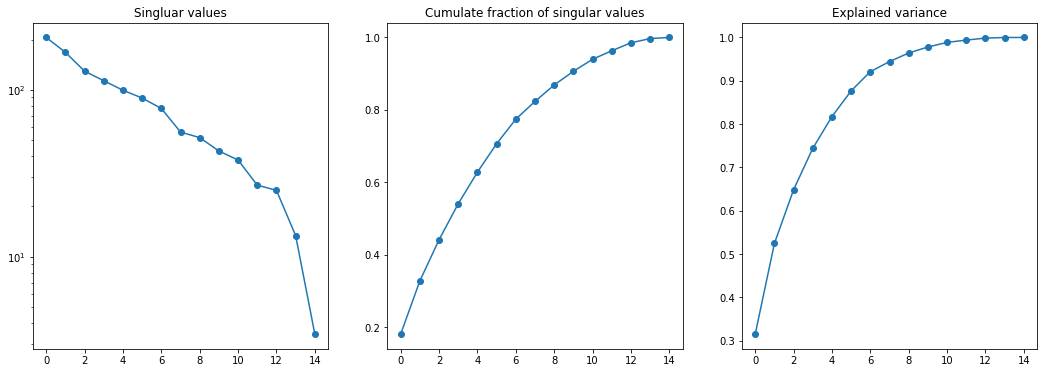

In [ ]:
A_mean = np.mean(A, axis = 1)
U, s, VT = np.linalg.svd(A - A_mean[:,None], full_matrices = False)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (18,6))

axes[0].semilogy(s[:-1], 'o-')
axes[0].set_title('Singluar values')

axes[1].plot(np.cumsum(s[:-1])/np.sum(s[:-1]), 'o-')
axes[1].set_title('Cumulate fraction of singular values')

axes[2].plot(np.cumsum(s[:-1]**2)/np.sum(s[:-1]**2), 'o-')
axes[2].set_title('Explained variance')

3. Print the first two principal directions. Which are the more important foods for these two directions? Knowing that mediterranean cuisine envisages a large use of garlic and olive oil, compared to the European average, do you expect a positive or negative 1st principal component for Italy?

**Answer:** The first principal direction is associated with a large use of garlic and olive oil. Therefore, we expect a large positive value for Italy. On the other hand, the 2nd principal direction is associated with a low use of crisp bread, and a large use of instant coffee rather than true coffee.

In [ ]:
pd.DataFrame({'food' : foods, '1st dir.' : U[:, 0], '2nd dir.' : U[:, 0]})

,food,1st dir.,2nd dir.
0,Real coffee,0.037985,0.037985
1,Instant coffee,-0.133786,-0.133786
2,Tea,-0.268790,-0.268790
3,Sweetener,-0.160447,-0.160447
4,Biscuits,-0.119544,-0.119544
5,Powder soup,-0.083328,-0.083328
6,Tin soup,-0.285098,-0.285098
7,Potatoes,-0.056791,-0.056791
8,Frozen fish,-0.095524,-0.095524
9,Frozen veggies,-0.144741,-0.144741


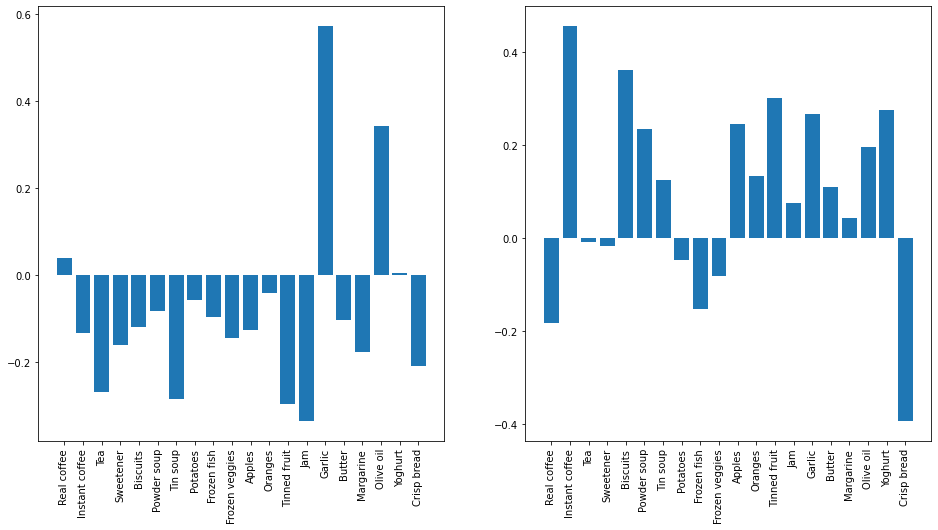

In [ ]:
fig, axs = plt.subplots(1,2,figsize = (16,8))
for i in range(2):
  axs[i].bar(foods, U[:, i])
  axs[i].set_xticklabels(foods, rotation=90)

3. Print the first two principal components. Based on these results:
- In which European region do you expect a large consume of crisp bread? Why? Is this confirmed by the original data?
- Which countries have food habits that are similar to Italy?
- Based on the two first principal components, what do you expect about the food habits in England? Is this confirmed by the original data?

**Answer:** 
- We expect a large consume of crisp bread in the Scandinavian peninsula since Sweden, Norway and Finland feature the lowest observed values in the second principal components. This is confirmed by data.
- Spain and Portugal (good advice on where to go on holidays if you want to eat well!)
- England has a large negative 1st p.c. and a large positive 2nd p.c. and therefore we expect, compared to the European average, a large use of instant coffe and a small use of garlic, olive oil and crisp bread. This is confirmed by data as well.

In [ ]:
Phi = np.matmul(U.transpose(), A - A_mean[:,None])
pd.DataFrame({'country' : countries, '1st comp.' : Phi[0,:], '2nd comp.' : Phi[1,:]})

,country,1st comp.,2nd comp.
0,Germany,-22.581798,11.567864
1,Italy,79.898082,-9.456294
2,France,35.862663,44.017228
3,Holland,-62.095349,26.972304
4,Belgium,11.306679,18.499703
5,Luxembourg,18.991592,61.964708
6,England,-87.268471,62.515451
7,Portugal,89.796844,-25.074261
8,Austria,34.631345,-31.516487
9,Switzerland,9.095261,28.808163


Text(0, 0.5, '2nd principal component')

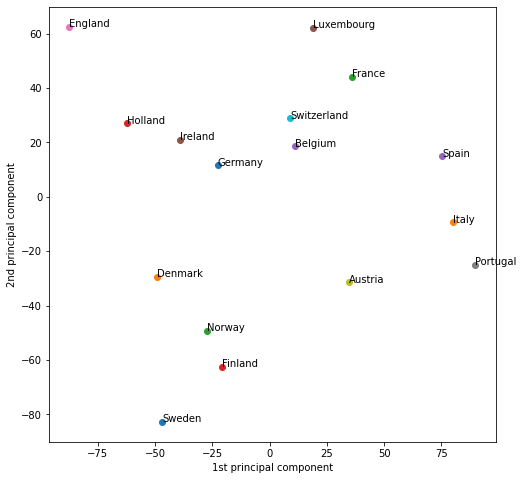

In [ ]:
fig, axs = plt.subplots(1,1,figsize = (8,8))
for i in range(num_samples):
  axs.scatter(Phi[0, i], Phi[1, i])
  axs.annotate(countries[i], (Phi[0, i], Phi[1, i]))
axs.set_xlabel('1st principal component')
axs.set_ylabel('2nd principal component')